<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** Sachin Bhat
**Student ID:** 218676233

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

VayuAir, a new airline in Australia, aims to enhance customer satisfaction by identifying key factors affecting it through customer survey data, with a focus on predictive capabilities for service improvement. The airline industry's competitive and changing environment requires a customer-centric approach for continuous service enhancement, involving stakeholders like VayuAir's management, operational staff, and regulatory bodies. They plan strategic improvements in customer service areas like booking, flight scheduling, and in-flight amenities to boost customer retention and competitive standing. Based on data analysis, applying focused improvements such as upgrading in-flight services and streamlining online check-in etc. alongside creating a predictive customer satisfaction model, promises long-term value through enhanced customer experiences and operational efficiency.

<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation

In [1]:
# Loading requires libraries
import pandas as pd #for data manipulation and analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation
from sklearn.metrics import precision_recall_curve, precision_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [3]:
# Loading data from my Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Exploring
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/Assignment 1/VayuAir.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Module_id,Response_ID,Satisfaction,Age,Gender,Customer type,Travel type,Ticket type,Flight distance,Departure delay in minutes,...,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
0,20461,27353,satisfied,29,Male,Loyal,Business,Business,697,0,...,3,5,3,2,2,2,5,4,5,2
1,39192,6970,satisfied,55,Female,Loyal,Business,Business,1501,0,...,5,2,5,5,3,5,2,5,5,3
2,82556,60407,neutral or dissatisfied,52,Male,Loyal,Personal,Economy,1476,1,...,5,3,3,2,2,2,4,3,5,2
3,55565,60678,satisfied,55,Male,Loyal,Business,Business,1728,6,...,5,4,5,5,3,5,4,5,5,5
4,92507,20042,neutral or dissatisfied,22,Female,Discontinued,Business,Business,607,90,...,4,4,3,4,4,4,4,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11001,33271,6694,neutral or dissatisfied,16,Male,Loyal,Business,Business,3184,0,...,3,1,1,3,3,3,3,1,4,3
11002,22986,127638,neutral or dissatisfied,8,Male,Loyal,Personal,Economy,1773,0,...,3,3,2,1,1,1,1,4,3,1
11003,70648,64671,satisfied,40,Male,Loyal,Business,Business,190,0,...,5,2,5,4,5,5,2,5,5,3
11004,26338,3449,neutral or dissatisfied,34,Male,Loyal,Personal,Economy,213,0,...,5,4,5,3,3,3,2,4,5,3


In [4]:
print('Sample size:', df.shape[0]) # Getting sample size of the data
print('Number of columns:', df.shape[1]) # Getting number of columns in the data
df.info() # Getting details such as non-null, count and datatype for all columns

Sample size: 11006
Number of columns: 25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11006 entries, 0 to 11005
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Module_id                    11006 non-null  int64  
 1   Response_ID                  11006 non-null  int64  
 2   Satisfaction                 11006 non-null  object 
 3   Age                          11006 non-null  int64  
 4   Gender                       11006 non-null  object 
 5   Customer type                11006 non-null  object 
 6   Travel type                  11006 non-null  object 
 7   Ticket type                  11006 non-null  object 
 8   Flight distance              11006 non-null  int64  
 9   Departure delay in minutes   11006 non-null  int64  
 10  Arrival delay in minutes     10953 non-null  float64
 11  Flight schedule suitability  11006 non-null  int64  
 12  Booking service              1100

In [5]:
df.tail(10) # Showing the last 10 rows

,Module_id,Response_ID,Satisfaction,Age,Gender,Customer type,Travel type,Ticket type,Flight distance,Departure delay in minutes,...,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
10996,84039,23762,satisfied,38,Female,Loyal,Business,Economy Plus,1048,44,...,4,5,2,3,3,3,3,5,5,3
10997,84710,110823,neutral or dissatisfied,13,Male,Loyal,Personal,Economy,997,96,...,2,2,3,1,1,1,2,3,2,1
10998,52126,22672,neutral or dissatisfied,39,Male,Discontinued,Business,Economy,589,0,...,1,1,2,4,4,4,1,1,5,4
10999,96355,12798,satisfied,29,Female,Loyal,Business,Business,817,92,...,1,2,4,5,5,5,2,2,2,5
11000,56125,125811,neutral or dissatisfied,31,Female,Discontinued,Business,Economy,1013,0,...,3,3,4,1,1,1,3,3,4,1
11001,33271,6694,neutral or dissatisfied,16,Male,Loyal,Business,Business,3184,0,...,3,1,1,3,3,3,3,1,4,3
11002,22986,127638,neutral or dissatisfied,8,Male,Loyal,Personal,Economy,1773,0,...,3,3,2,1,1,1,1,4,3,1
11003,70648,64671,satisfied,40,Male,Loyal,Business,Business,190,0,...,5,2,5,4,5,5,2,5,5,3
11004,26338,3449,neutral or dissatisfied,34,Male,Loyal,Personal,Economy,213,0,...,5,4,5,3,3,3,2,4,5,3
11005,96093,51579,satisfied,20,Female,Discontinued,Business,Economy,598,0,...,5,4,1,4,5,5,4,2,1,5


In [6]:
df.describe() # Exploring descriptive statistics

,Module_id,Response_ID,Age,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,Booking service,Online checkin,Airport checkin,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
count,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,10953.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000
mean,51552.059876,64444.827639,39.166455,1192.900600,14.954843,15.313065,3.060240,2.751772,3.250681,3.303743,3.621570,2.967109,3.372978,3.440305,3.192986,3.347810,2.697438,3.338633,3.616391,3.285935
std,29856.805088,37450.871536,15.057573,997.654205,40.395278,40.858194,1.529924,1.400585,1.351438,1.272917,1.188573,1.267641,1.288185,1.326153,1.336113,1.347843,1.329239,1.329732,1.193973,1.325566
min,13.000000,3.000000,7.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25735.500000,32033.250000,27.000000,413.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,51624.000000,64367.500000,40.000000,852.500000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,77280.750000,97000.500000,50.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,103878.000000,129869.000000,85.000000,4963.000000,1017.000000,1011.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.isnull().sum().sort_values(ascending=False) # Inspecting missing data

Arrival delay in minutes       53
Module_id                       0
Online checkin                  0
Inflight amenities quality      0
Leg room                        0
Inflight wifi                   0
Inflight entertainment          0
Food and drink                  0
Seat comfort                    0
Cabin crew service              0
Boarding service                0
Baggage handling                0
Airport checkin                 0
Booking service                 0
Response_ID                     0
Flight schedule suitability     0
Departure delay in minutes      0
Flight distance                 0
Ticket type                     0
Travel type                     0
Customer type                   0
Gender                          0
Age                             0
Satisfaction                    0
Cleanliness                     0
dtype: int64

In [8]:
no_missing_df = df[df['Arrival delay in minutes'].notnull()] # Removing rows having missing values in the 'Arrival delay in minutes' column
no_missing_df.isnull().sum().sort_values(ascending=False) # Counting values in each column in the dataframe

Module_id                      0
Online checkin                 0
Inflight amenities quality     0
Leg room                       0
Inflight wifi                  0
Inflight entertainment         0
Food and drink                 0
Seat comfort                   0
Cabin crew service             0
Boarding service               0
Baggage handling               0
Airport checkin                0
Booking service                0
Response_ID                    0
Flight schedule suitability    0
Arrival delay in minutes       0
Departure delay in minutes     0
Flight distance                0
Ticket type                    0
Travel type                    0
Customer type                  0
Gender                         0
Age                            0
Satisfaction                   0
Cleanliness                    0
dtype: int64

In [9]:
no_missing_df.shape

(10953, 25)

In [10]:
no_missing_df.describe()

,Module_id,Response_ID,Age,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,Booking service,Online checkin,Airport checkin,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
count,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000,10953.000000
mean,51544.864877,64474.103898,39.173012,1193.383365,14.917739,15.313065,3.060349,2.750936,3.250160,3.303844,3.621839,2.967497,3.373414,3.441523,3.192915,3.348398,2.696978,3.338446,3.616361,3.286314
std,29872.502179,37440.270627,15.057175,998.556131,40.409718,40.858194,1.530107,1.400477,1.351438,1.272454,1.188024,1.267551,1.287929,1.326074,1.336109,1.347851,1.329529,1.329979,1.194015,1.325775
min,13.000000,3.000000,7.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,25713.000000,32055.000000,27.000000,413.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000
50%,51643.000000,64417.000000,40.000000,852.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,77283.000000,97007.000000,50.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,103878.000000,129869.000000,85.000000,4963.000000,1017.000000,1011.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
no_missing_df

,Module_id,Response_ID,Satisfaction,Age,Gender,Customer type,Travel type,Ticket type,Flight distance,Departure delay in minutes,...,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
0,20461,27353,satisfied,29,Male,Loyal,Business,Business,697,0,...,3,5,3,2,2,2,5,4,5,2
1,39192,6970,satisfied,55,Female,Loyal,Business,Business,1501,0,...,5,2,5,5,3,5,2,5,5,3
2,82556,60407,neutral or dissatisfied,52,Male,Loyal,Personal,Economy,1476,1,...,5,3,3,2,2,2,4,3,5,2
3,55565,60678,satisfied,55,Male,Loyal,Business,Business,1728,6,...,5,4,5,5,3,5,4,5,5,5
4,92507,20042,neutral or dissatisfied,22,Female,Discontinued,Business,Business,607,90,...,4,4,3,4,4,4,4,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10948,25887,84824,neutral or dissatisfied,42,Female,Loyal,Business,Business,547,14,...,1,4,1,3,2,1,1,1,1,1
10949,52097,4977,satisfied,48,Female,Loyal,Business,Business,502,0,...,5,2,5,5,3,5,2,5,5,5
10950,100757,76360,satisfied,48,Male,Loyal,Business,Business,1695,76,...,3,3,3,4,2,3,3,3,3,4
10951,55068,129402,satisfied,47,Female,Loyal,Business,Business,236,2,...,5,4,5,5,3,5,4,5,5,3


### **Univariate Analyses**

Satisfaction

Satisfaction
neutral or dissatisfied    6200
satisfied                  4753
Name: count, dtype: int64

Satisfaction Percentages:
 Satisfaction
neutral or dissatisfied    56.605496
satisfied                  43.394504
Name: count, dtype: float64


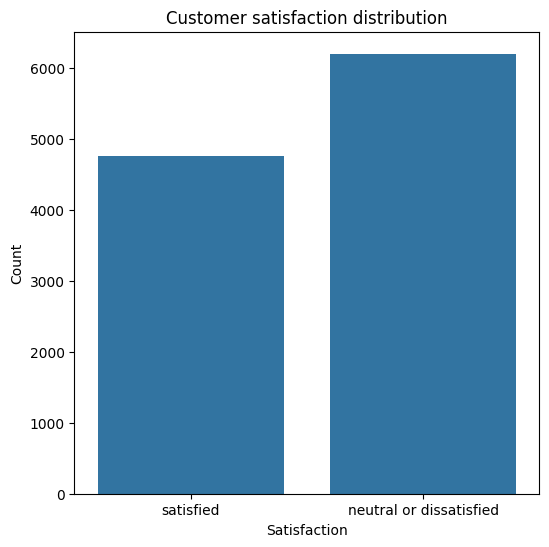

In [12]:
# Counting the number of satisfied and non-satisfied customers while reporting %.
satisfaction_counts = no_missing_df['Satisfaction'].value_counts()
print(satisfaction_counts)
satisfaction_percentages = satisfaction_counts / no_missing_df['Satisfaction'].count() * 100
print("\nSatisfaction Percentages:\n", satisfaction_percentages)

# Visualizing customer satisfaction
plt.figure(figsize=(6, 6)) # Setting the figure size
sns.countplot(data=no_missing_df, x='Satisfaction') # Creating the countplot
plt.title('Customer satisfaction distribution') # Setting the title
plt.xlabel('Satisfaction') # Labelling x-axis
plt.ylabel('Count') # Labelling y-axis
plt.show() # Printing the plot

Age

In [13]:
# Statistics for Age
age_summary = no_missing_df['Age'].describe()
print("Age Summary Statistics:\n", age_summary)


Age Summary Statistics:
 count    10953.000000
mean        39.173012
std         15.057175
min          7.000000
25%         27.000000
50%         40.000000
75%         50.000000
max         85.000000
Name: Age, dtype: float64


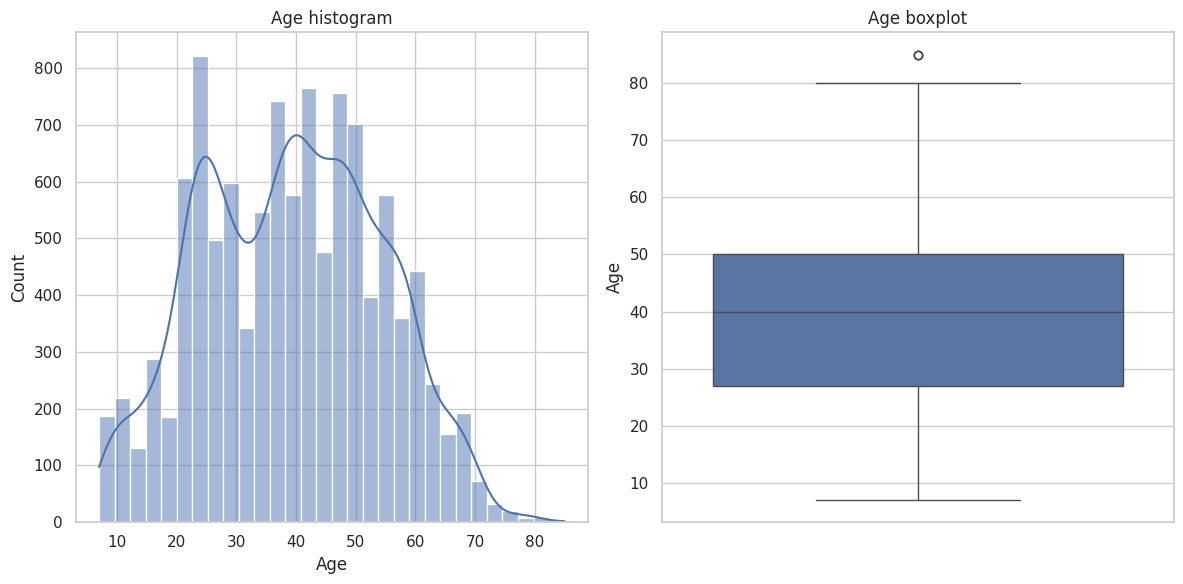

In [14]:
sns.set(style="whitegrid")  # Setting the plot style

# Plotting Age distribution
plt.figure(figsize=(12, 6)) # Setting the figure size.

# Histogram
plt.subplot(1, 2, 1)  # Dividing the plot area into a grid, and selecting the first part for the Histogram
sns.histplot(no_missing_df['Age'], kde=True, bins=30) # Creating the histogram with a KDE plot on it to better understand the graph
plt.title('Age histogram') # Setting its title

# Boxplot
plt.subplot(1, 2, 2)  # Selecting the second part of the grid for the Boxplot
sns.boxplot(y=no_missing_df['Age']) # Creating the boxplot.
plt.title('Age boxplot') # Setting its  title

plt.tight_layout() # Bettering the layout
plt.show() # Showing the plots


Gender

In [15]:
gender_counts = no_missing_df['Gender'].value_counts()
gender_percentages = gender_counts / no_missing_df.shape[0] * 100
print("Gender Counts:\n", gender_counts)
print("\nGender Percentages:\n", gender_percentages)

Gender Counts:
 Gender
Female    5600
Male      5353
Name: count, dtype: int64

Gender Percentages:
 Gender
Female    51.127545
Male      48.872455
Name: count, dtype: float64


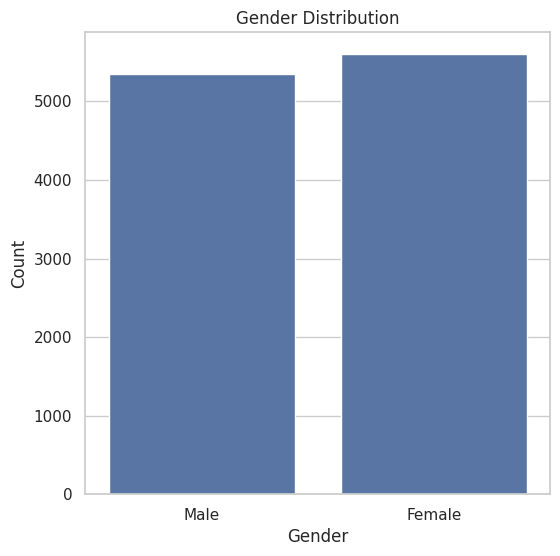

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=no_missing_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Customer Type

In [17]:
customer_type_counts = no_missing_df['Customer type'].value_counts()
customer_type_percentages = customer_type_counts / no_missing_df.shape[0] * 100
print("Customer Type Counts:\n", customer_type_counts)
print("\nCustomer Type Percentages:\n", customer_type_percentages)

Customer Type Counts:
 Customer type
Loyal           8940
Discontinued    2013
Name: count, dtype: int64

Customer Type Percentages:
 Customer type
Loyal           81.621474
Discontinued    18.378526
Name: count, dtype: float64


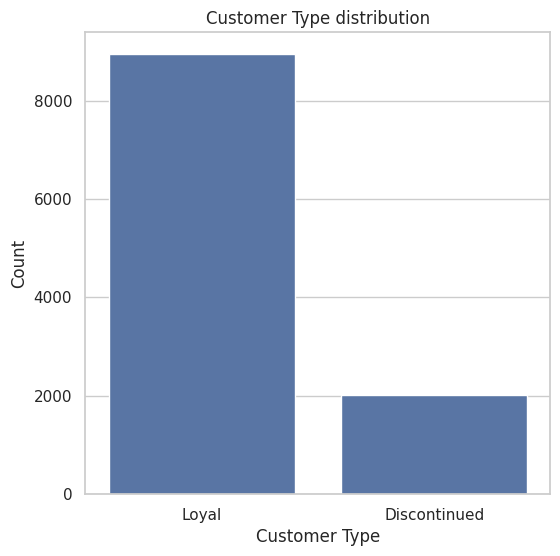

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Customer type', data=no_missing_df)
plt.title('Customer Type distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

Travel Type

In [19]:
travel_type_counts = no_missing_df['Travel type'].value_counts()
travel_type_percentages = travel_type_counts / no_missing_df.shape[0] * 100
print("Travel Type Counts:\n", travel_type_counts)
print("\nTravel Type percentages:\n", travel_type_percentages)

Travel Type Counts:
 Travel type
Business    7555
Personal    3398
Name: count, dtype: int64

Travel Type percentages:
 Travel type
Business    68.976536
Personal    31.023464
Name: count, dtype: float64


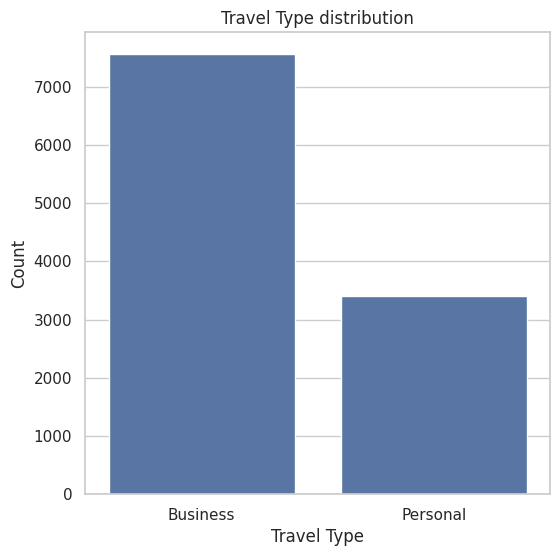

In [20]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Travel type', data=no_missing_df)
plt.title('Travel Type distribution')
plt.xlabel('Travel Type')
plt.ylabel('Count')
plt.show()

Ticket Type

In [21]:
ticket_type_counts = no_missing_df['Ticket type'].value_counts()
ticket_type_percentages = ticket_type_counts / no_missing_df.shape[0] * 100
print("Ticket Type Counts:\n", ticket_type_counts)
print("\nTicket Type Percentages:\n", ticket_type_percentages)

Ticket Type Counts:
 Ticket type
Business        5209
Economy         4959
Economy Plus     785
Name: count, dtype: int64

Ticket Type Percentages:
 Ticket type
Business        47.557747
Economy         45.275267
Economy Plus     7.166986
Name: count, dtype: float64


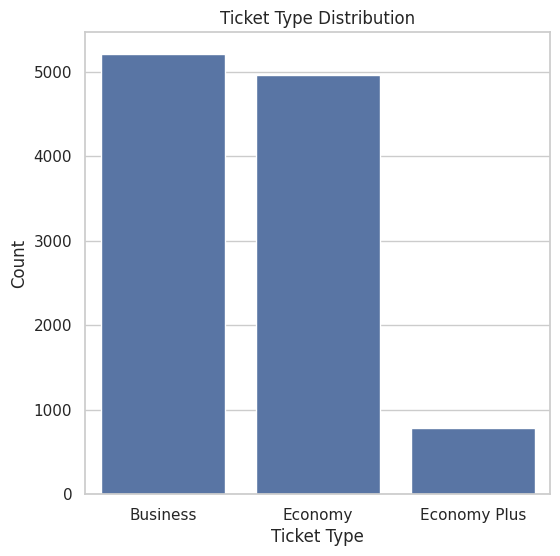

In [22]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Ticket type', data=no_missing_df)
plt.title('Ticket Type Distribution')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.show()

### **Bivariate Analyses**

Satisfaction by Age

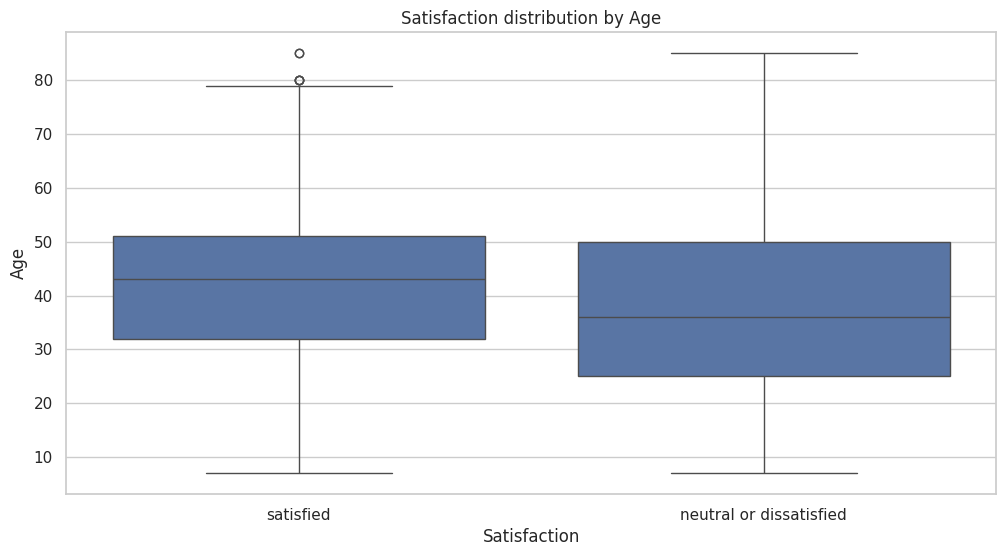

In [23]:
plt.figure(figsize=(12, 6)) # Setting the figures
sns.boxplot(x='Satisfaction', y='Age', data=no_missing_df) # Creating the boxplot
plt.title('Satisfaction distribution by Age') # Setting the title
plt.xlabel('Satisfaction') # Lavelling x-axis
plt.ylabel('Age') # Lavelling y-axis
plt.show() # Printing the plot

Satisfaction by Female gender

In [24]:
# Filtering for the female gender
female_df = no_missing_df[no_missing_df['Gender'].str.lower() == 'female']

In [25]:
female_satisfaction_counts = female_df['Satisfaction'].value_counts()
female_satisfaction_percentages = female_satisfaction_counts / female_df.shape[0] * 100
print("Female Satisfaction Counts:\n", female_satisfaction_counts)
print("\nFemale Satisfaction Percentages:\n", female_satisfaction_percentages)

Female Satisfaction Counts:
 Satisfaction
neutral or dissatisfied    3184
satisfied                  2416
Name: count, dtype: int64

Female Satisfaction Percentages:
 Satisfaction
neutral or dissatisfied    56.857143
satisfied                  43.142857
Name: count, dtype: float64


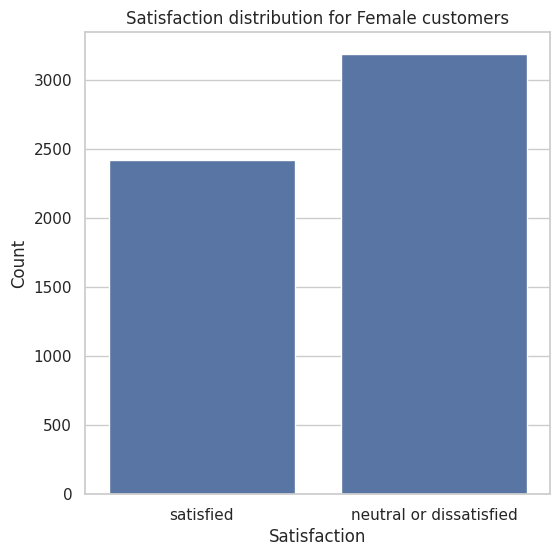

In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Satisfaction', data=female_df)
plt.title('Satisfaction distribution for Female customers')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Satisfaction by Male gender

In [27]:
# Filtering for the male gender
male_df = no_missing_df[no_missing_df['Gender'].str.lower() == 'male']

In [28]:
male_satisfaction_counts = male_df['Satisfaction'].value_counts()
male_satisfaction_percentages = male_satisfaction_counts / male_df.shape[0] * 100
print("Male Satisfaction Counts:\n", male_satisfaction_counts)
print("\nMale Satisfaction Percentages:\n", male_satisfaction_percentages)

Male Satisfaction Counts:
 Satisfaction
neutral or dissatisfied    3016
satisfied                  2337
Name: count, dtype: int64

Male Satisfaction Percentages:
 Satisfaction
neutral or dissatisfied    56.342238
satisfied                  43.657762
Name: count, dtype: float64


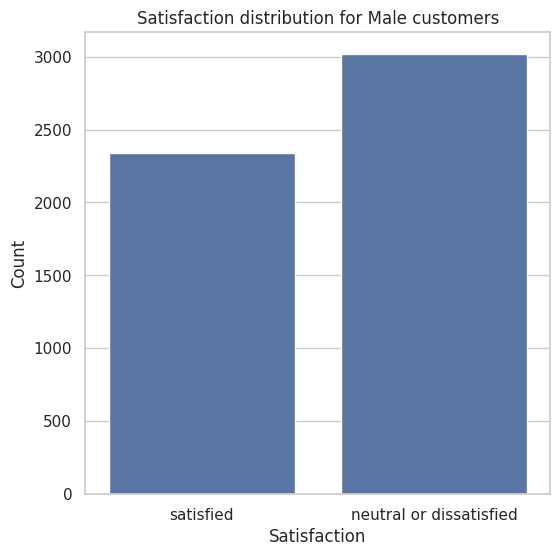

In [29]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Satisfaction', data=male_df)
plt.title('Satisfaction distribution for Male customers')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Satisfaction by Travel Type

Satisfaction  neutral or dissatisfied  satisfied
Travel type                                     
Business                         3166       4389
Personal                         3034        364


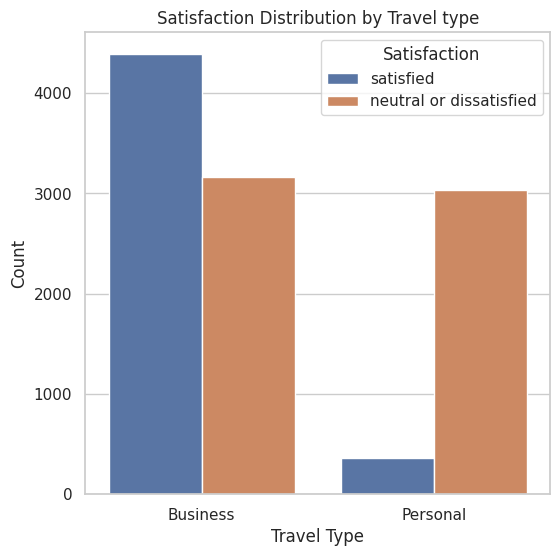

In [30]:
# Cross-tabulating Satisfaction and Travel Type
travel_satisfaction_counts = pd.crosstab(no_missing_df['Travel type'], no_missing_df['Satisfaction'])
print(travel_satisfaction_counts)

plt.figure(figsize=(6, 6))
sns.countplot(x='Travel type', hue='Satisfaction', data=no_missing_df)
plt.title('Satisfaction Distribution by Travel type')
plt.xlabel('Travel Type')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()


Satisfaction by Ticket Type

Satisfaction  neutral or dissatisfied  satisfied
Ticket type                                     
Business                         1574       3635
Economy                          4032        927
Economy Plus                      594        191


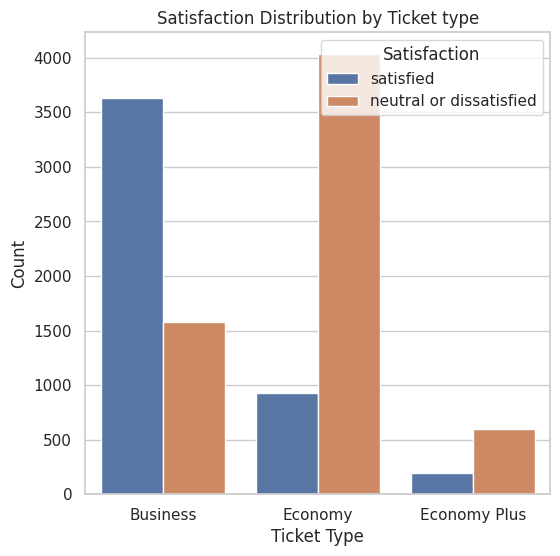

In [31]:
# Cross-tabulating Satisfaction and Ticket Type
ticket_satisfaction_counts = pd.crosstab(no_missing_df['Ticket type'], no_missing_df['Satisfaction'])
print(ticket_satisfaction_counts)

plt.figure(figsize=(6, 6))
sns.countplot(x='Ticket type', hue='Satisfaction', data=no_missing_df)
plt.title('Satisfaction Distribution by Ticket type')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.show()

Satisfaction by Flight Distance (Kms)

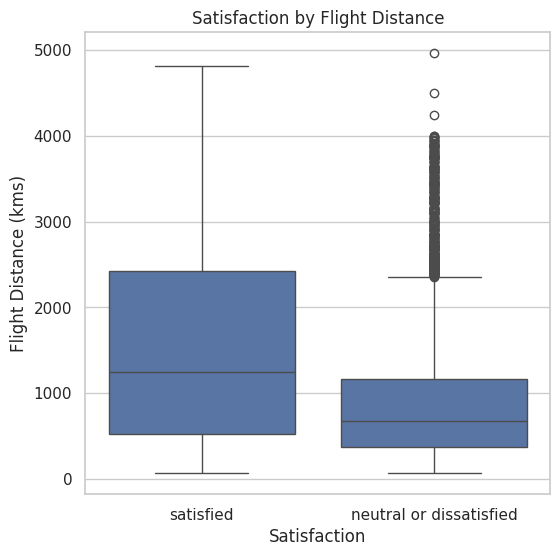

In [32]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Satisfaction', y='Flight distance', data=no_missing_df)
plt.title('Satisfaction by Flight Distance')
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance (kms)')
plt.show()

**In-flight Services**

Satisfaction by Cabin crew service, seat comfort, food and drink, inflight entertainment, and inflight wifi

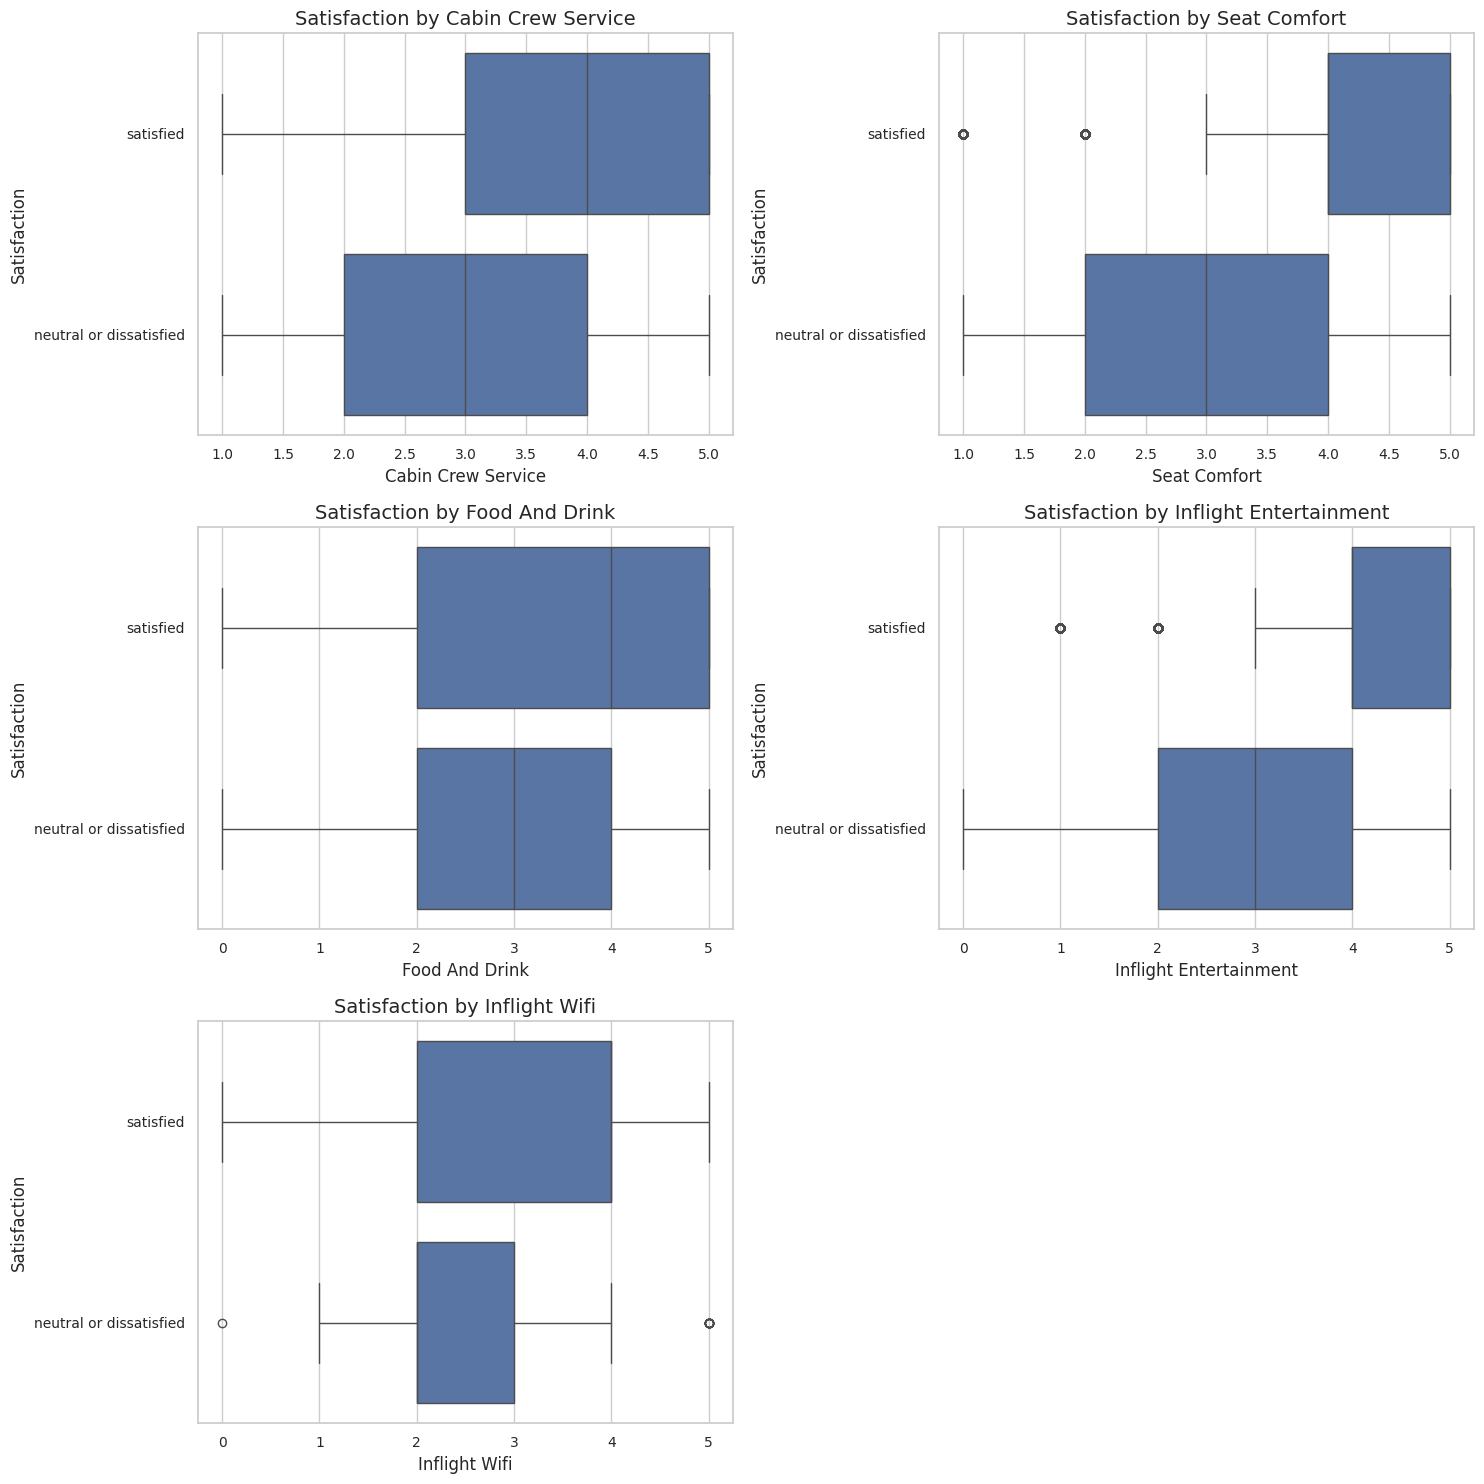

In [33]:
sns.set(style="whitegrid")

service_aspects = ['Cabin crew service', 'Seat comfort', 'Food and drink', 'Inflight entertainment', 'Inflight wifi'] # List of inflight services

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  # Adjusting the grid size depending on the no. of variables
axes = axes.flatten()  # Flattening the array for easy use

for i, aspect in enumerate(service_aspects):
    sns.boxplot(ax=axes[i], x=aspect, y='Satisfaction', data=no_missing_df)
    axes[i].set_title(f'Satisfaction by {aspect.title()}', fontsize=14)
    axes[i].set_xlabel(aspect.title(), fontsize=12)
    axes[i].set_ylabel('Satisfaction', fontsize=12)
    axes[i].tick_params(labelsize=10)
if len(service_aspects) % 2 != 0: # Hiding the last unused subplot to make it visually appealing
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

**Airport services**

Satisfaction by Airport checkin

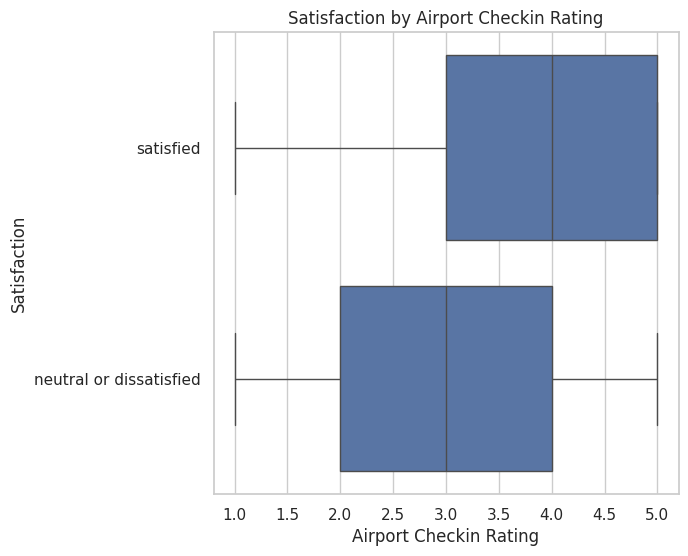

In [34]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Airport checkin', y='Satisfaction', data=no_missing_df)
plt.title('Satisfaction by Airport Checkin Rating')
plt.xlabel('Airport Checkin Rating')
plt.ylabel('Satisfaction')
plt.show()

Satisfaction by Baggage handling

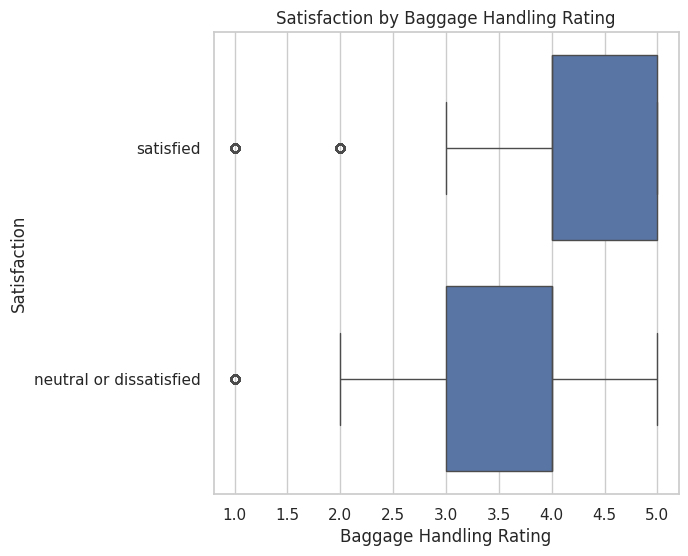

In [35]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Baggage handling', y='Satisfaction', data=no_missing_df)
plt.title('Satisfaction by Baggage Handling Rating')
plt.xlabel('Baggage Handling Rating')
plt.ylabel('Satisfaction')
plt.show()

Satisfaction by Boarding service

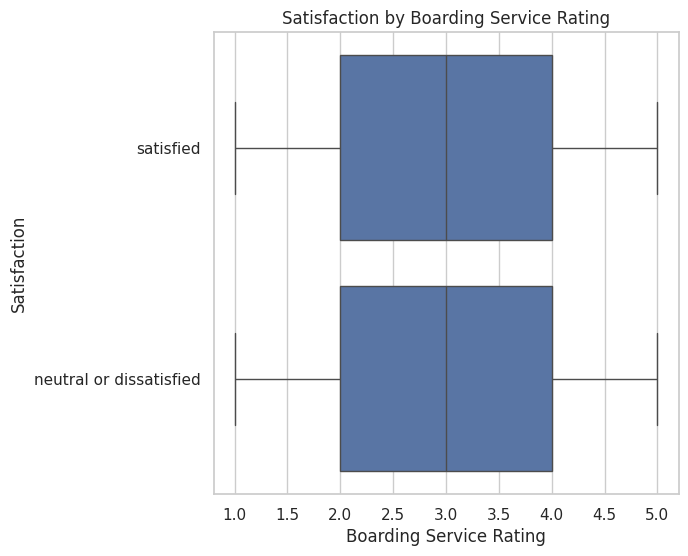

In [36]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Boarding service', y='Satisfaction', data=no_missing_df)
plt.title('Satisfaction by Boarding Service Rating')
plt.xlabel('Boarding Service Rating')
plt.ylabel('Satisfaction')
plt.show()

**Online services**

Satisfaction by Booking service

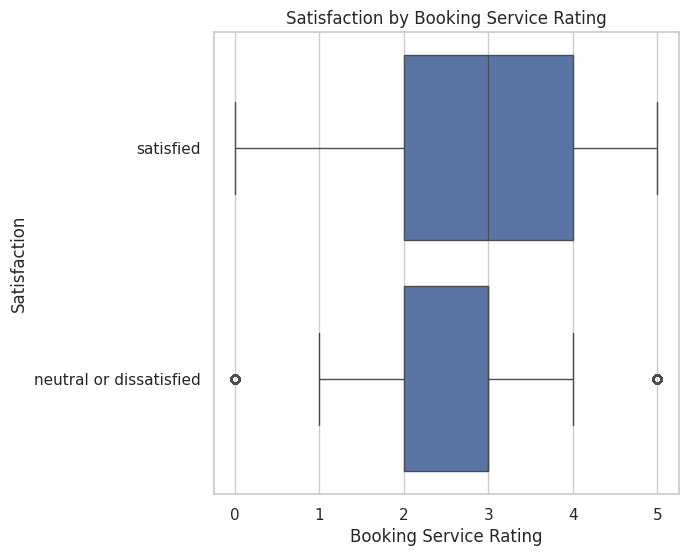

In [37]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Booking service', y='Satisfaction', data=no_missing_df)
plt.title('Satisfaction by Booking Service Rating')
plt.xlabel('Booking Service Rating')
plt.ylabel('Satisfaction')
plt.show()

Satisfaction by Online check-in

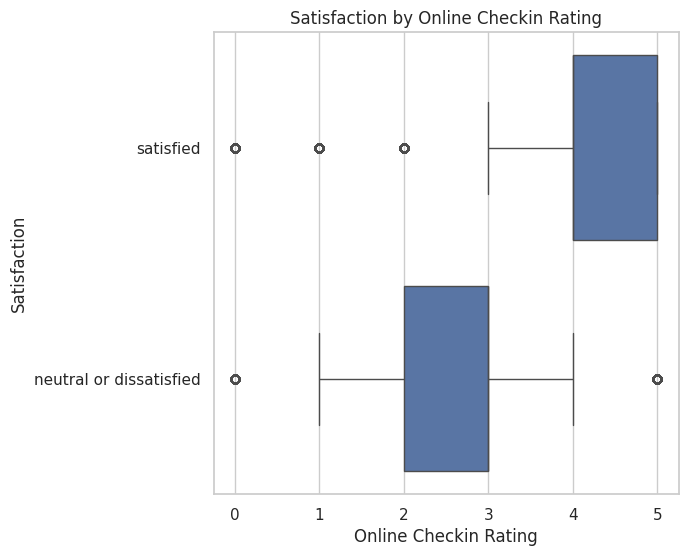

In [38]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Online checkin', y='Satisfaction', data=no_missing_df)
plt.title('Satisfaction by Online Checkin Rating')
plt.xlabel('Online Checkin Rating')
plt.ylabel('Satisfaction')
plt.show()

### **Encoding Variables**

Encoding Satisfaction

In [39]:
# Initialising the Label encoder
label_encoder = LabelEncoder()

# Encoding the variable "Satisfaction"
no_missing_df['Satisfaction_encoded'] = label_encoder.fit_transform(no_missing_df['Satisfaction']) # "satisfied" is encoded as 1 and "neutral or dissatisfied" is encoded as 0.

# Printing the top 5 lines after encoding
print(no_missing_df[['Satisfaction', 'Satisfaction_encoded']].head())


              Satisfaction  Satisfaction_encoded
0                satisfied                     1
1                satisfied                     1
2  neutral or dissatisfied                     0
3                satisfied                     1
4  neutral or dissatisfied                     0


<ipython-input-39-0c7f1c62b7cc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_missing_df['Satisfaction_encoded'] = label_encoder.fit_transform(no_missing_df['Satisfaction']) # "satisfied" is encoded as 1 and "neutral or dissatisfied" is encoded as 0.


Encoding Gender, Customer type, Travel type, and Ticket type

In [40]:
# Using the one-hot encoding for our nominal categorical variables
nominal_categories = ['Gender', 'Customer type', 'Travel type', 'Ticket type']
no_missing_df_encoded = pd.get_dummies(no_missing_df, columns=nominal_categories, drop_first=True)

# Printing the top 5 lines of the encoded dataframe
no_missing_df_encoded.head()

,Module_id,Response_ID,Satisfaction,Age,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,Booking service,Online checkin,...,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness,Satisfaction_encoded,Gender_Male,Customer type_Loyal,Travel type_Personal,Ticket type_Economy,Ticket type_Economy Plus
0,20461,27353,satisfied,29,697,0,0.0,5,5,2,...,5,4,5,2,1,True,True,False,False,False
1,39192,6970,satisfied,55,1501,0,0.0,2,4,5,...,2,5,5,3,1,False,True,False,False,False
2,82556,60407,neutral or dissatisfied,52,1476,1,0.0,5,4,4,...,4,3,5,2,0,True,True,True,True,False
3,55565,60678,satisfied,55,1728,6,0.0,4,4,4,...,4,5,5,5,1,True,True,False,False,False
4,92507,20042,neutral or dissatisfied,22,607,90,94.0,3,4,4,...,4,2,3,4,0,False,False,False,False,False


Checking Total Delay in Minutes' Relevancy

In [41]:
no_missing_df_encoded['Total_Delay_in_Minutes'] = no_missing_df['Departure delay in minutes'] + no_missing_df['Arrival delay in minutes'] # Bivariate Analysis After putting them together

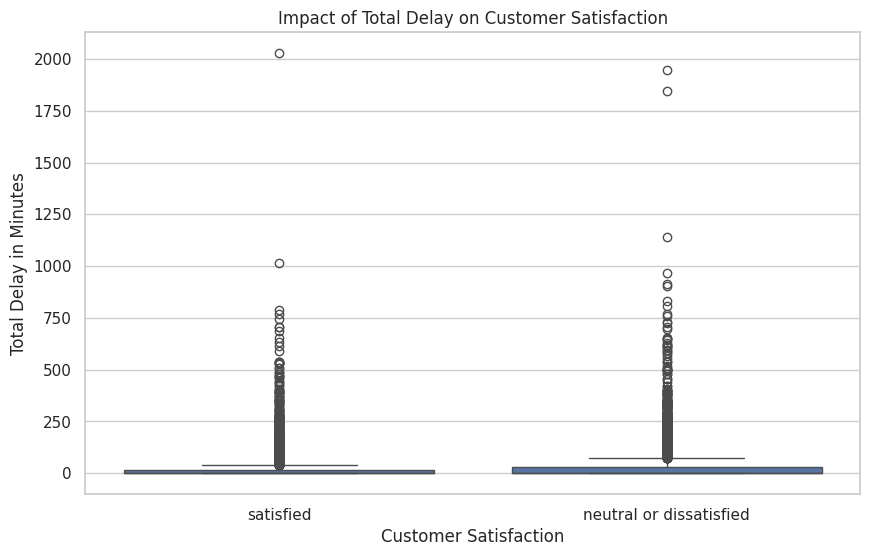

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Total_Delay_in_Minutes', data=no_missing_df_encoded)
plt.title('Impact of Total Delay on Customer Satisfaction')
plt.xlabel('Customer Satisfaction')
plt.ylabel('Total Delay in Minutes')
plt.show()

In [43]:
if 'Satisfaction_encoded' not in no_missing_df_encoded.columns:
    no_missing_df_encoded['Satisfaction_encoded'] = label_encoder.fit_transform(no_missing_df_encoded['Satisfaction'])

correlation = no_missing_df_encoded['Satisfaction_encoded'].corr(no_missing_df_encoded['Total_Delay_in_Minutes'])
print(f"Correlation between Total Delay and Satisfaction: {correlation}")

Correlation between Total Delay and Satisfaction: -0.056251172293311


### **Multivariate Analyses** for Additional Insights

Which **Age** groups are **satisfied** with **food and drinks** in flights ?

<ipython-input-44-498604b519c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_missing_df['Age Group'] = age_bins


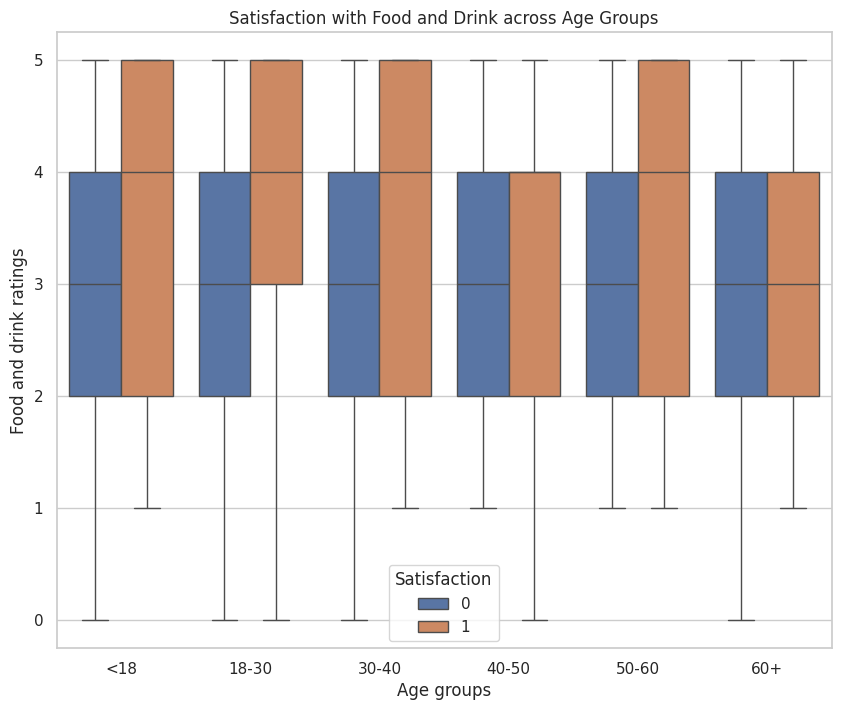

In [44]:
# Segmenting age
age_bins = pd.cut(no_missing_df['Age'], bins=[0, 18, 30, 40, 50, 60, np.inf], labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+'])
no_missing_df['Age Group'] = age_bins

plt.figure(figsize=(10, 8))
sns.boxplot(x='Age Group', y='Food and drink', hue='Satisfaction_encoded', data=no_missing_df) # Using "Satisfaction_encoded"
plt.title('Satisfaction with Food and Drink across Age Groups') # Setting the title
plt.xlabel('Age groups') # Labelling x-axis
plt.ylabel('Food and drink ratings') # Labelling y-axis
plt.legend(title='Satisfaction', loc='best')
plt.show()

Which **Age** groups are **satisfied** with **inflight entertainmen**t ?

In [45]:
# Defining bins for age
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
no_missing_df['Age Group'] = pd.cut(no_missing_df['Age'], bins=bins, labels=labels, right=False)


<ipython-input-45-4e48b7484ade>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_missing_df['Age Group'] = pd.cut(no_missing_df['Age'], bins=bins, labels=labels, right=False)


In [46]:
# Setting up a pivot table for further use
pivot_table = no_missing_df.pivot_table(values='Satisfaction_encoded',
                                        index='Age Group',
                                        columns='Inflight entertainment',
                                        aggfunc=np.mean, # To see average satisfaction for each combination of "Age Group" and "Inflight entertainment"
                                        fill_value=0)

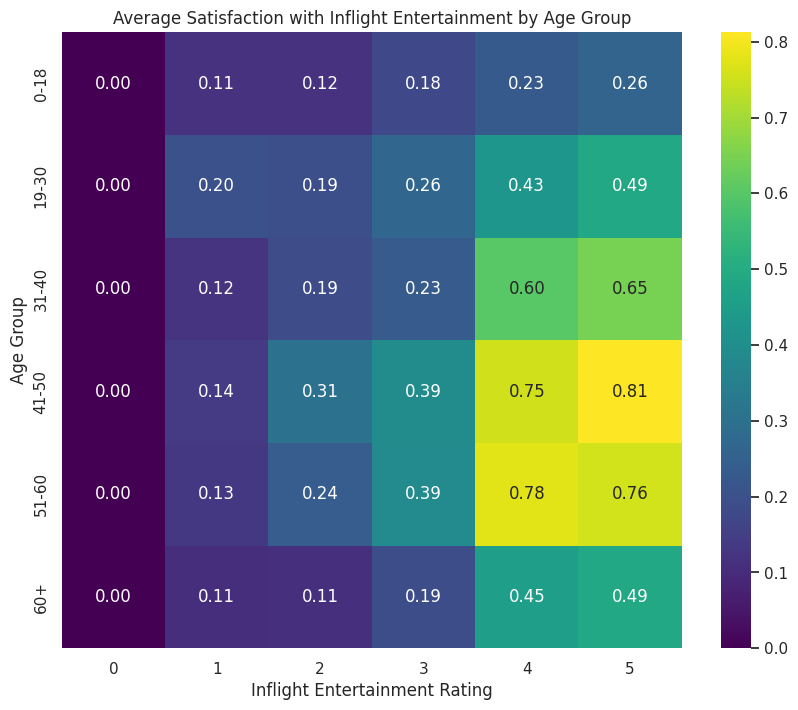

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Satisfaction with Inflight Entertainment by Age Group')
plt.xlabel('Inflight Entertainment Rating')
plt.ylabel('Age Group')
plt.show()

### **Feature Selection**

Selecting Label

In [48]:
# Selecting Label
y = no_missing_df_encoded['Satisfaction_encoded']

Selecting Features

In [49]:
# Keeping the wanted/relatable features
features_to_keep = ['Booking service', 'Online checkin', 'Airport checkin', 'Baggage handling', 'Boarding service', 'Inflight wifi', 'Seat comfort',
                    'Inflight entertainment', 'Cabin crew service', 'Leg room', 'Inflight amenities quality', 'Cleanliness', 'Ticket type_Economy',
                    'Ticket type_Economy Plus', 'Flight distance', 'Total_Delay_in_Minutes', 'Travel type_Personal','Food and drink']

X = no_missing_df_encoded[features_to_keep]

<a id = "cell_modeling"></a>
## 3. Machine learning model development

In [50]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X = no_missing_df_encoded.drop(['Module_id', 'Response_ID', 'Age', 'Satisfaction', 'Satisfaction_encoded','Departure delay in minutes',
                    'Arrival delay in minutes', 'Customer type_Loyal', 'Flight schedule suitability', 'Gender_Male'], axis=1)
y = no_missing_df_encoded['Satisfaction_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_train.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [52]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
print(X_train.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [54]:
# Creating and training the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                      


In [55]:
# Printing Accuracy, Precision, Recall, F1 Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.867183934276586
Precision: 0.8554083885209713
Recall: 0.8288770053475936
F1 Score: 0.841933731667572


Classification Report

In [56]:
# Printing Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1256
           1       0.86      0.83      0.84       935

    accuracy                           0.87      2191
   macro avg       0.87      0.86      0.86      2191
weighted avg       0.87      0.87      0.87      2191



Confusion Matrix

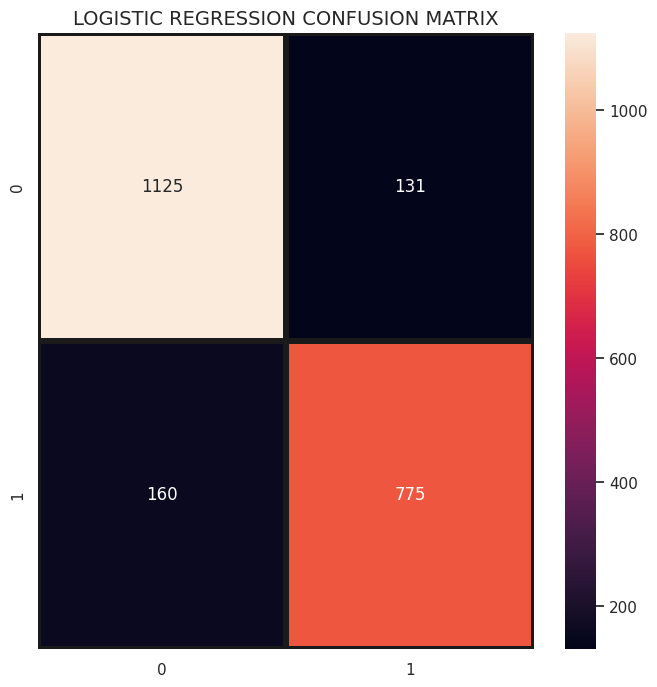

In [57]:
# Plotting Confusion Matrix heatmap
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1125  131]
 [ 160  775]]


ROC Curve

Best threshold 0.46293034162853386


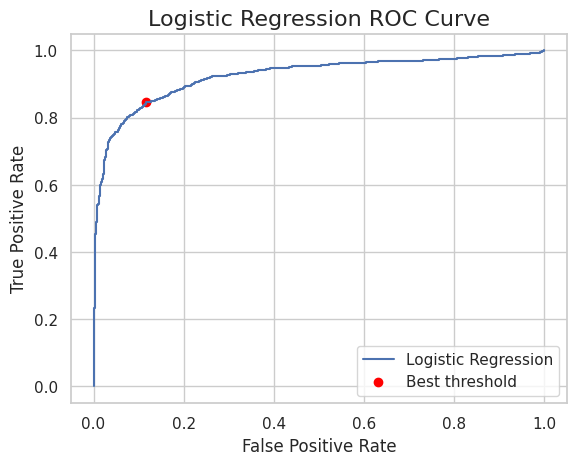

In [59]:
# Plotting ROC Curve
y_pred_prob = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plotting the threshold based on the distance between tpr - fpr
optimal_idx = (tpr - fpr).argmax()
best_threshold = thresholds[optimal_idx]
print('Best threshold', best_threshold)

plt.plot(fpr, tpr, label='Logistic Regression')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o',
color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.legend()
plt.show()

Getting weights of variables

Axes(0.125,0.11;0.775x0.77)


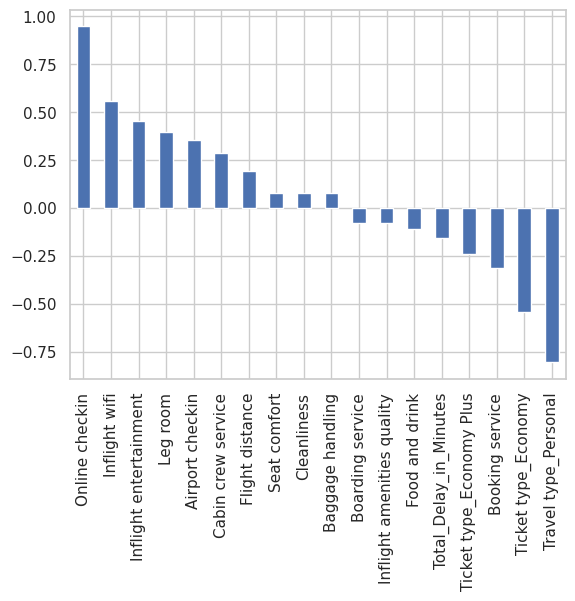

In [60]:
# To get the weights of all the variables
weights = pd.Series(logreg.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False).plot(kind='bar'))

In [61]:
# Extract the coefficients from the model
coefficients = logreg.coef_[0]
# Extract the intercept from the model
intercept = logreg.intercept_[0]

# Construct the model formula as a string
model_terms = [f"{coef:.4f}*{feature}" for coef, feature in zip(coefficients, X.columns)]
model_formula = "log_odds = " + " + ".join(model_terms) + f" + {intercept:.4f}"

print("Model Formula:")
print(model_formula)

Model Formula:
log_odds = 0.1911*Flight distance + -0.3142*Booking service + 0.9472*Online checkin + 0.3545*Airport checkin + 0.0771*Baggage handling + -0.0797*Boarding service + 0.2880*Cabin crew service + 0.0791*Seat comfort + -0.1119*Food and drink + 0.4552*Inflight entertainment + 0.5555*Inflight wifi + 0.3971*Leg room + -0.0804*Inflight amenities quality + 0.0789*Cleanliness + -0.8048*Travel type_Personal + -0.5408*Ticket type_Economy + -0.2420*Ticket type_Economy Plus + -0.1578*Total_Delay_in_Minutes + -0.5134


# Improving Performance

Removing 'Food and drink'

In [62]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X = no_missing_df_encoded.drop(['Module_id', 'Response_ID', 'Age', 'Satisfaction', 'Satisfaction_encoded','Departure delay in minutes',
                    'Arrival delay in minutes', 'Flight schedule suitability', 'Gender_Male', 'Food and drink'], axis=1)
y = no_missing_df_encoded['Satisfaction_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
print(X_train.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [64]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
print(X_train.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [66]:
# Creating and training the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]

Evaluating after changes

In [67]:
# Printing Accuracy, Precision, Recall, F1 Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8781378366042902
Precision: 0.8702882483370288
Recall: 0.839572192513369
F1 Score: 0.8546543277082198


In [68]:
# Printing Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1256
           1       0.87      0.84      0.85       935

    accuracy                           0.88      2191
   macro avg       0.88      0.87      0.87      2191
weighted avg       0.88      0.88      0.88      2191



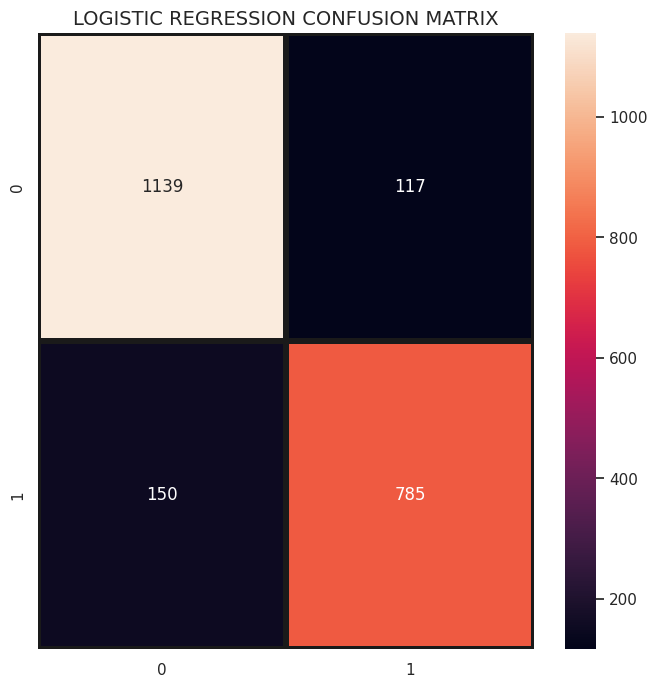

In [69]:
# Plotting Confusion Matrix heatmap
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [70]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1139  117]
 [ 150  785]]


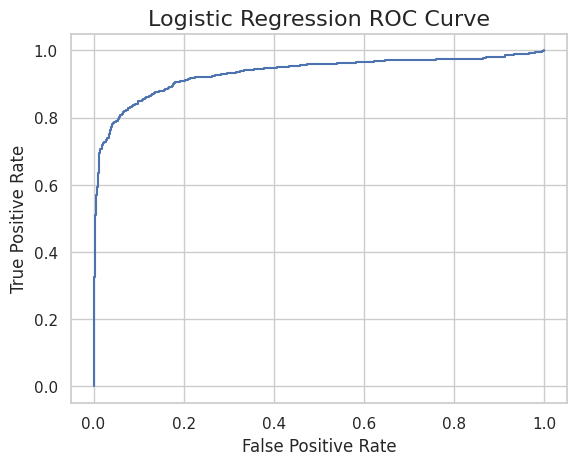

In [71]:
# Plotting ROC Curve
y_pred_prob = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()